### Computação Quântica com Qiskit

##### Jonas Maziero

<table>
<td> Universidade Federal de Santa Maria <br>
Centro de Ciências Naturais e Exatas <br>
Departamento de Física <br>
https://sites.google.com/site/jonasmaziero <br>
jonas.maziero@ufsm.br 
    </td>
    <td><img src='ufsm.jpg' width='250'></td>
    <td><img src='inpe_ufsm.jpg' width='550'></td>
</table>
<table>
    <td>Suporte Financeiro:</td>
    <td><img src='cnpq.png' width='200'></td>
    <td><img src='inct-iq.png' width='330'></td>
    <td><img src='capes.png' width='100'></td>
    <td><img src='fapergs.png' width='150'></td>
    <td><img src='ufsm.jpg' width='75'></td>
    </table>

## Aula 5

- Codificação densa;
- Mitigação de erros;
- Codificação densa com mitigação de erros;
- Swap de emaranhamento;
- Swap de emaranhamento com mitigação de erros.

# Codificação densa

__Limite de Holevo__: Não é possível extrair mais que $n$ cbits de $n$ qubits.

## Protocolo
Para $|\Phi_+\rangle = (|00\rangle+|11\rangle)/\sqrt{2}$ temos
\begin{align}
& (I\otimes I)|\Phi_+\rangle = |\Phi_+\rangle,\ (Z\otimes I)|\Phi_+\rangle = |\Phi_-\rangle, \\
& (X\otimes I)|\Phi_+\rangle = |\Psi_+\rangle,\ (ZX\otimes I)|\Phi_+\rangle = |\Psi_-\rangle.
\end{align}

<table><td><img src='dense_coding.png' width='1200'></td></table>

##### Detalhes das contas
\begin{align}
(I\otimes I)|\Phi_+\rangle & = 2^{-1/2}(I|0\rangle\otimes|0\rangle+I|1\rangle\otimes|1\rangle)= 2^{-1/2}(|0\rangle\otimes|0\rangle+|1\rangle\otimes|1\rangle) \\
& = |\Phi_+\rangle,\\
(Z\otimes I)|\Phi_+\rangle & = 2^{-1/2}(Z|0\rangle\otimes|0\rangle+Z|1\rangle\otimes|1\rangle) = 2^{-1/2}(|0\rangle\otimes|0\rangle-|1\rangle\otimes|1\rangle) \\
& = |\Phi_-\rangle, \\
(X\otimes I)|\Phi_+\rangle & = 2^{-1/2}(X|0\rangle\otimes|0\rangle+X|1\rangle\otimes|1\rangle) = 2^{-1/2}(|1\rangle\otimes|0\rangle+|0\rangle\otimes|1\rangle) \\
& = |\Psi_+\rangle,\\
(ZX\otimes I)|\Phi_+\rangle & = 2^{-1/2}(ZX|0\rangle\otimes|0\rangle+ZX|1\rangle\otimes|1\rangle) \\
& = 2^{-1/2}(Z|1\rangle\otimes|0\rangle+Z|0\rangle\otimes|1\rangle) \\
& = 2^{-1/2}(-|1\rangle\otimes|0\rangle+|0\rangle\otimes|1\rangle) \\
& = |\Psi_-\rangle.
\end{align}
i.e., Alice prepara qualquer estado da base de Bell começando em um desses estados.

__Problema:__ Refaça os cálculos do protocolo de codificação densa considerando que Alice e Bob compartilham inicialmente o estado emaranhado $|\Psi_+\rangle_{AB} = (|01\rangle_{AB}+|10\rangle_{AB})/\sqrt{2}$, estabelecendo a correspondência entre a codificação/operação de Alice com a decodificação/resultado obtido por Bob.

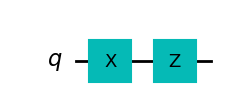

In [47]:
def qc_alice_encoding(cb):
    from qiskit import QuantumCircuit
    qc = QuantumCircuit(1, name='AE')
    if cb == '00':
        qc.id(0)
    elif cb == '01':
        qc.x(0)
    elif cb == '10':
        qc.z(0)
    elif cb == '11':
        qc.x(0); qc.z(0)
    return qc
cb = '11'
qcae = qc_alice_encoding(cb)
qcae.draw('mpl')

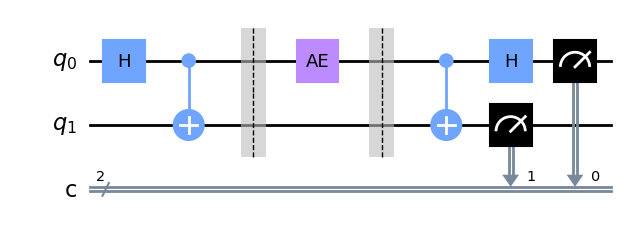

In [48]:
from qiskit import QuantumCircuit # só pra mostrar o circuito quântico
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.barrier()
qcae = qc_alice_encoding(cb)
qc.append(qcae, [0])
qc.barrier()
qc.cx(0,1)
qc.h(0)
qc.measure([0,1],[0,1])
qc.draw('mpl')

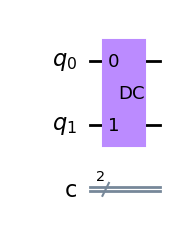

In [49]:
def qc_dense_coding(cb):    
    from qiskit import QuantumCircuit
    qc = QuantumCircuit(2, name='DC')
    qc.h(0); qc.cx(0,1) # compartilha o par emaranhado
    qcae = qc_alice_encoding(cb); qc.append(qcae, [0]) # codificação da Alice
    qc.cx(0,1); qc.h(0)#; qc.measure([0,1],[0,1]) # decodificação, medida na BB, do Bob
    # OBS. Não consegui incluir um subcircuito que contenha medidas
    return qc
from qiskit import QuantumCircuit
qc = QuantumCircuit(2,2)
qcdc = qc_dense_coding('00')
qc.append(qcdc, [0,1])
qc.draw('mpl')

### Simulação

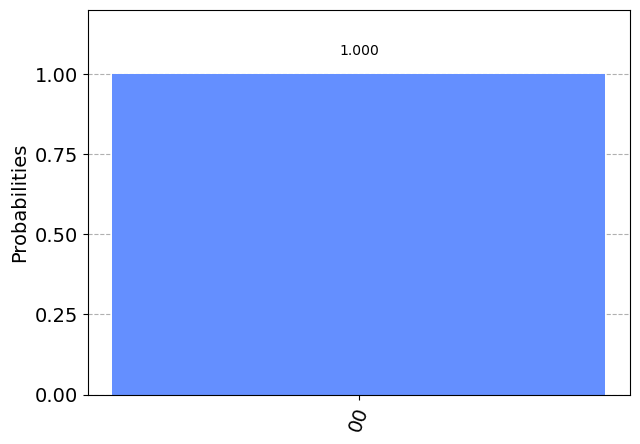

In [26]:
from qiskit import Aer, execute, QuantumCircuit; simulator = Aer.get_backend('qasm_simulator')
nshots = 2**13; from qiskit import QuantumCircuit
qc = QuantumCircuit(2,2); qcdc = qc_dense_coding('00'); qc.append(qcdc, [0,1]); qc.measure([0,1],[0,1])
job = execute(qc, backend=simulator, shots=nshots); counts = job.result().get_counts()
from qiskit.tools.visualization import plot_histogram; plot_histogram(counts)

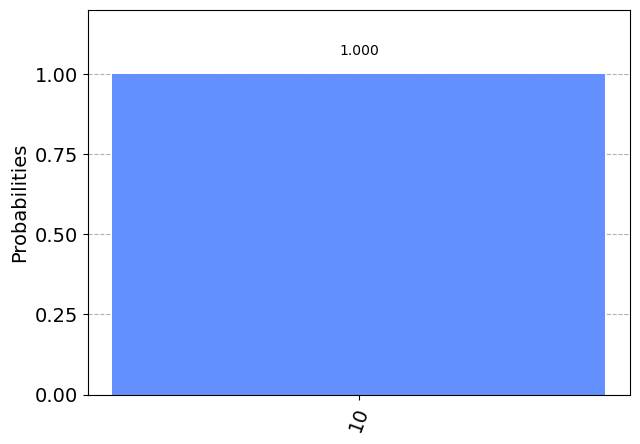

In [27]:
from qiskit import Aer, execute, QuantumCircuit
simulator = Aer.get_backend('qasm_simulator')
nshots = 2**13
from qiskit import QuantumCircuit
qc = QuantumCircuit(2,2); qcdc = qc_dense_coding('01'); qc.append(qcdc, [0,1])
qc.measure([0,1],[0,1])
job = execute(qc, backend=simulator, shots=nshots); counts = job.result().get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

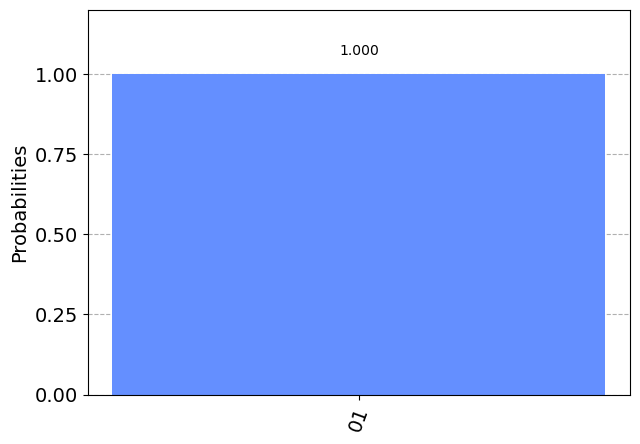

In [28]:
from qiskit import Aer, execute, QuantumCircuit
simulator = Aer.get_backend('qasm_simulator')
nshots = 2**13
from qiskit import QuantumCircuit
qc = QuantumCircuit(2,2); qcdc = qc_dense_coding('10'); qc.append(qcdc, [0,1])
qc.measure([0,1],[0,1])
job = execute(qc, backend=simulator, shots=nshots); counts = job.result().get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

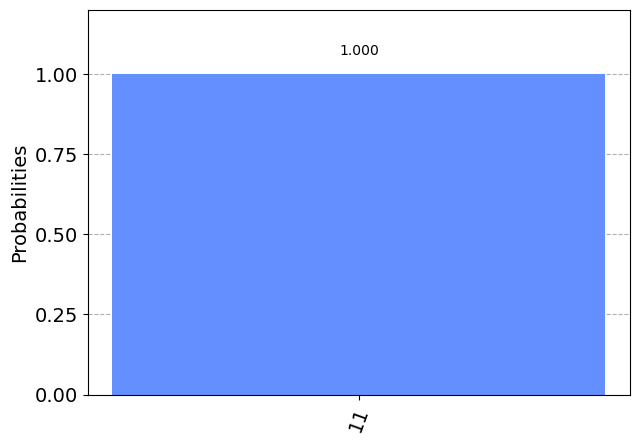

In [29]:
from qiskit import Aer, execute, QuantumCircuit
simulator = Aer.get_backend('qasm_simulator')
nshots = 2**13
from qiskit import QuantumCircuit
qc = QuantumCircuit(2,2); qcdc = qc_dense_coding('11'); qc.append(qcdc, [0,1])
qc.measure([0,1],[0,1])
job = execute(qc, backend=simulator, shots=nshots); counts = job.result().get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

### Experimento

In [31]:
import qiskit
qiskit.IBMQ.save_account('72f5d1e3769658b4908c384492eb3a9bd6d6ac4ab1fdf613d7fbe72884114d62728d6fd60a8bf8d0b6698f2f5463a605742658fee1ce3318181105c6acb8120e', 
                  overwrite = True)
qiskit.IBMQ.load_account()
provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')

In [32]:
from qiskit import QuantumCircuit, execute
device = provider.get_backend('ibm_nairobi')
nshots = 2**13
qc = QuantumCircuit(2,2); qcdc = qc_dense_coding('00'); qc.append(qcdc, [0,1]); qc.measure([0,1],[0,1])
job = execute(qc, backend=device, shots=nshots); jobid = job.job_id(); print(jobid)

cmj6f1m0t6t00085y6r0


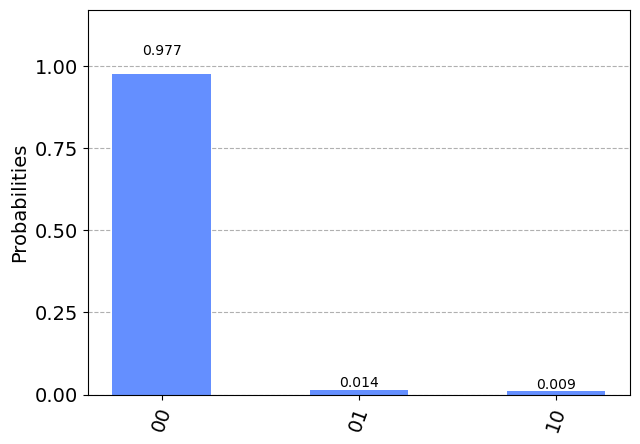

In [61]:
job = device.retrieve_job('cmj6f1m0t6t00085y6r0')
from qiskit.tools.visualization import plot_histogram; plot_histogram(job.result().get_counts())

In [33]:
from qiskit import QuantumCircuit, execute
device = provider.get_backend('ibm_nairobi')
nshots = 2**13
qc = QuantumCircuit(2,2); qcdc = qc_dense_coding('01'); qc.append(qcdc, [0,1]); qc.measure([0,1],[0,1])
job = execute(qc, backend=device, shots=nshots); jobid = job.job_id(); print(jobid)

cmj6f7c0t6t00085y6rg


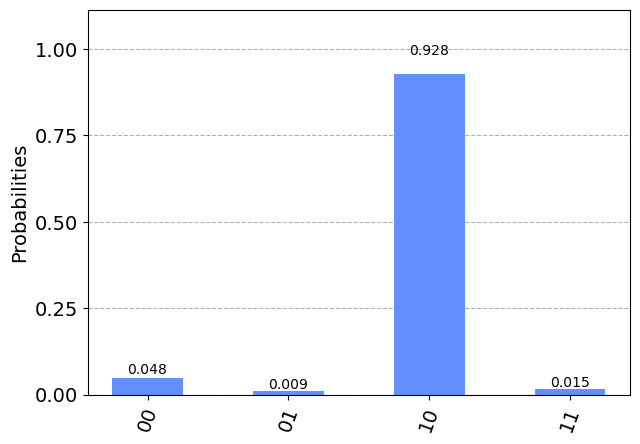

In [62]:
job = device.retrieve_job('cmj6f7c0t6t00085y6rg')
plot_histogram(job.result().get_counts())

In [34]:
from qiskit import QuantumCircuit, execute
device = provider.get_backend('ibm_nairobi')
nshots = 2**13
qc = QuantumCircuit(2,2); qcdc = qc_dense_coding('10'); qc.append(qcdc, [0,1]); qc.measure([0,1],[0,1])
job = execute(qc, backend=device, shots=nshots); jobid = job.job_id(); print(jobid)

cmj6f9nstv5g008dwdb0


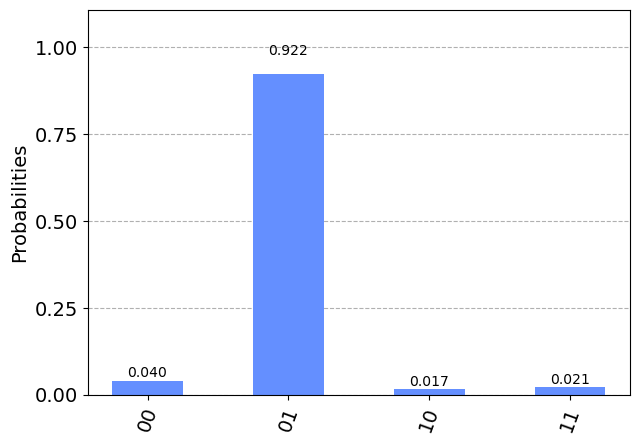

In [63]:
job = device.retrieve_job('cmj6f9nstv5g008dwdb0')
plot_histogram(job.result().get_counts())

In [36]:
#provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider = qiskit.IBMQ.get_provider(hub='ibm-q-research-2', group='federal-uni-sant-1', project='main')
from qiskit import QuantumCircuit, execute; device = provider.get_backend('ibm_nairobi'); nshots = 2**13
qc = QuantumCircuit(2,2); qcdc = qc_dense_coding('11'); qc.append(qcdc, [0,1]); qc.measure([0,1],[0,1])
job = execute(qc, backend=device, shots=nshots); jobid = job.job_id(); print(jobid)

cmj6g3g0t6t00085y6sg


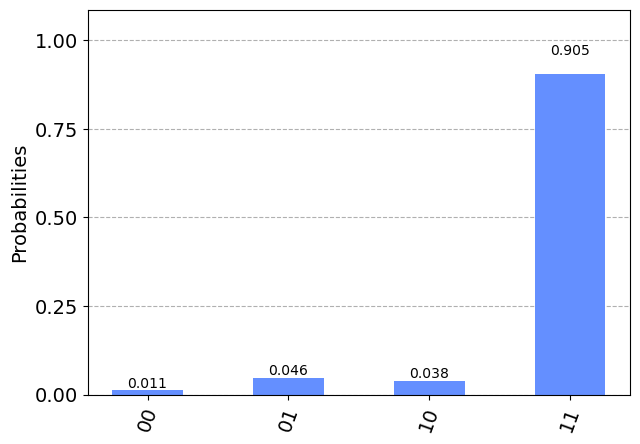

In [97]:
job = device.retrieve_job('cmj6g3g0t6t00085y6sg')
plot_histogram(job.result().get_counts())

__Problema__: Refaça as simulações clássicas e experimentos quânticos para verificar o funcionamento do protocolo de codificação densa considerando que o estado emaranhado compartilhado inicialmente pelos qubits de Alice e Bob é $|\Psi_+\rangle_{AB} = (|01\rangle_{AB}+|10\rangle_{AB})/\sqrt{2}$.

# Codificação densa com mitigação de erros 
(com pós-processamento)

In [11]:
import qiskit
qiskit.IBMQ.save_account('e20d3045c7c23a3be753606794714e9b47d4331ec46a41b2281e2d601bae27b2b3c1baa0b5cb54f3282a8b5248e552b14c9c556699010660fb94b11d00ff1073', 
                  overwrite = True)
qiskit.IBMQ.load_account()
#provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider = qiskit.IBMQ.get_provider(hub='ibm-q-research-2', group='federal-uni-sant-1', project='main')
device = provider.get_backend('ibm_nairobi')
nshots = 2**13

ibmqfactory.load_account:WARNING:2023-10-12 16:19:23,426: Credentials are already in use. The existing account in the session will be replaced.


In [12]:
from qiskit import QuantumRegister, execute
from qiskit.ignis.mitigation.measurement import complete_meas_cal
qr_ = QuantumRegister(2)
qubit_list_ = [0, 1] # qubits para os quais aplicaremos calibracao de medidas
meas_calibs, state_labels = complete_meas_cal(qubit_list = qubit_list_, qr = qr_)
meas_calibs # circuitos que serão executados para mitigação dos erros

In [13]:
state_labels # estados que serão preparados/medidos/corrigidos

['00', '01', '10', '11']

In [14]:
job = execute(meas_calibs, backend=device, shots=nshots)
print(job.job_id())

cmm4vmyrcq000080ceqg


In [16]:
from qiskit.ignis.mitigation.measurement import CompleteMeasFitter
job = device.retrieve_job('cmm4vmyrcq000080ceqg')
cal_results = job.result()
# função que usaremos para corrigir resultados experimentais
meas_fitter = CompleteMeasFitter(cal_results, state_labels) 
# OBS. Uma vez feito isso para um chip e para uns certos qubits, depois é só usar

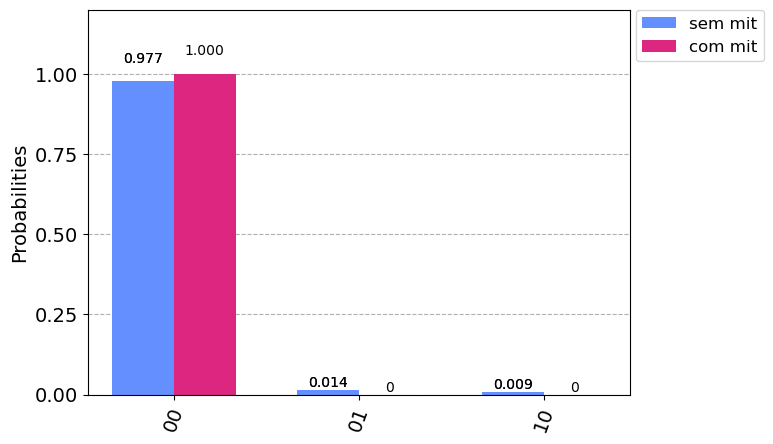

In [31]:
job = device.retrieve_job('cmj6f1m0t6t00085y6r0') # dados do experimento da codificação densa para '00'
unmitigated_counts = job.result().get_counts()
mitigated_results = meas_fitter.filter.apply(job.result()) # corrige os resultados usando mitigação
mitigated_counts = mitigated_results.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram([unmitigated_counts, mitigated_counts], legend=['sem mit', 'com mit'])

In [34]:
def prob_erro(counts, target, nshots): # Calcula a probabilidade de erro
    if target in counts:
        pacerto = counts[target]/nshots
        perro = 1 - pacerto
    return perro

In [35]:
print('Probabilidade de erro SEM mitigação: ',prob_erro(unmitigated_counts, '00', nshots))
print('Probabilidade de erro COM mitigação: ',prob_erro(mitigated_counts, '00',nshots))

Probabilidade de erro SEM mitigação:  0.0230712890625
Probabilidade de erro COM mitigação:  0.0


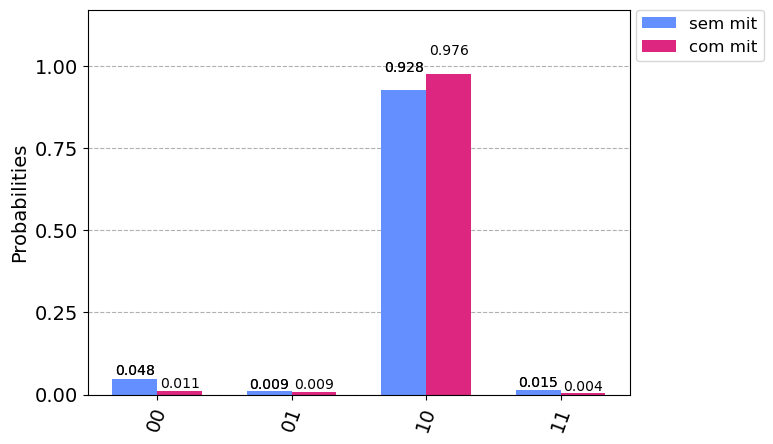

In [40]:
job = device.retrieve_job('cmj6f7c0t6t00085y6rg') # dados do experimento da codificação densa para '01'
unmitigated_counts = job.result().get_counts()
mitigated_results = meas_fitter.filter.apply(job.result()) # corrige os resultados usando mitigação
mitigated_counts = mitigated_results.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram([unmitigated_counts, mitigated_counts], legend=['sem mit', 'com mit'])

In [42]:
print('Probabilidade de erro SEM mitigação: ',prob_erro(unmitigated_counts, '10', nshots))
print('Probabilidade de erro COM mitigação: ',prob_erro(mitigated_counts, '10',nshots))

Probabilidade de erro SEM mitigação:  0.0723876953125
Probabilidade de erro COM mitigação:  0.023826808133219912


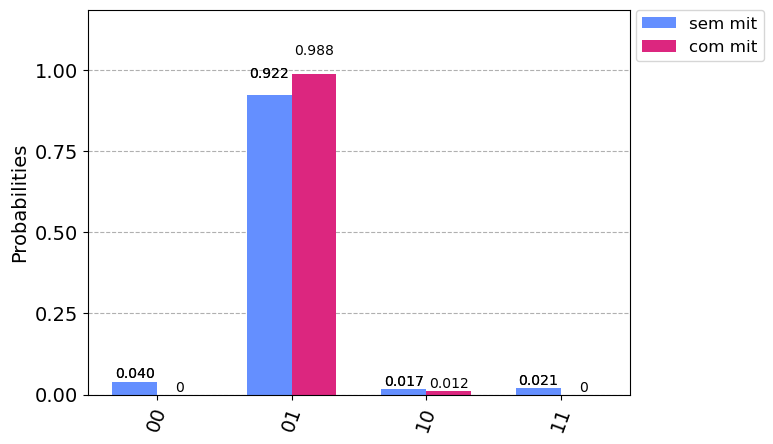

In [43]:
job = device.retrieve_job('cmj6f9nstv5g008dwdb0'); unmitigated_counts = job.result().get_counts()
mitigated_results = meas_fitter.filter.apply(job.result()) # corrige os resultados usando mitigação
mitigated_counts = mitigated_results.get_counts(); from qiskit.tools.visualization import plot_histogram
plot_histogram([unmitigated_counts, mitigated_counts], legend=['sem mit', 'com mit'])

In [44]:
print('Probabilidade de erro SEM mitigação: ',prob_erro(unmitigated_counts, '01', nshots))
print('Probabilidade de erro COM mitigação: ',prob_erro(mitigated_counts, '01',nshots))

Probabilidade de erro SEM mitigação:  0.07763671875
Probabilidade de erro COM mitigação:  0.011978301861264695


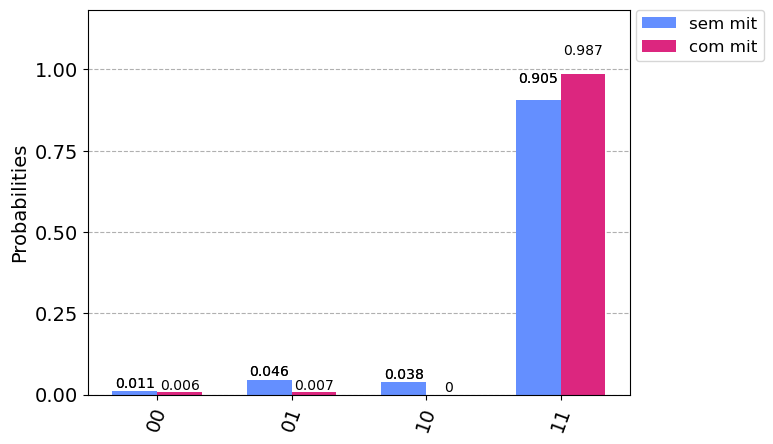

In [45]:
job = device.retrieve_job('cmj6g3g0t6t00085y6sg') # dados do experimento da codificação densa para '11'
unmitigated_counts = job.result().get_counts(); mitigated_results = meas_fitter.filter.apply(job.result())
mitigated_counts = mitigated_results.get_counts(); from qiskit.tools.visualization import plot_histogram
plot_histogram([unmitigated_counts, mitigated_counts], legend=['sem mit', 'com mit'])

In [46]:
print('Probabilidade de erro SEM mitigação: ',prob_erro(unmitigated_counts, '11', nshots))
print('Probabilidade de erro COM mitigação: ',prob_erro(mitigated_counts, '11',nshots))

Probabilidade de erro SEM mitigação:  0.09521484375
Probabilidade de erro COM mitigação:  0.013222937040031635


__Problema__: Prepare o estado de 2 qubits $|+\rangle\otimes|+\rangle$ e faça medidas na base de Bell. Faça os experimentos e aplique mitigação de erros. Compare os resultados obtidos sem e com mitigação de erros. 

# Swap de emaranhamento

<table>
    <td><img src='entanglement_swap.png' width='700'></td>
</table>
\begin{align}|\Phi_+\rangle_{AC}|\Phi_+\rangle_{C'B} & = (1/2)\big(|\Phi_+\rangle_{CC'}|\Phi_+\rangle_{AB} + |\Psi_+\rangle_{CC'}|\Psi_+\rangle_{AB} + |\Psi_-\rangle_{CC'}|\Psi_-\rangle_{AB} \\
& \hspace{3cm}+ |\Phi_-\rangle_{CC'}|\Phi_-\rangle_{AB}\big)
\end{align}

##### Detalhes das contas
Usa
\begin{align}
& |\Phi_\pm\rangle=(|00\rangle\pm|11\rangle)/\sqrt{2},\\
& |\Psi_\pm\rangle=(|01\rangle\pm|10\rangle)/\sqrt{2},
\end{align}
para obter 
\begin{align}
& |00\rangle=(|\Phi_+\rangle+|\Phi_-\rangle)/\sqrt{2},\\
& |11\rangle=(|\Phi_+\rangle-|\Phi_-\rangle)/\sqrt{2},\\
& |01\rangle=(|\Psi_+\rangle+|\Psi_-\rangle)/\sqrt{2},\\
& |10\rangle=(|\Psi_+\rangle-|\Psi_-\rangle)/\sqrt{2}.
\end{align}

Assim
\begin{align}
& |\Phi_+\rangle_{AC}|\Phi_+\rangle_{C'B} = 2^{-1/2}\big(|00\rangle_{AC}+|11\rangle_{AC}\big)2^{-1/2}\big(|00\rangle_{C'B}+|11\rangle_{C'B}\big) \\
& = 2^{-1}\big(|00\rangle_{AC}|00\rangle_{C'B}+|11\rangle_{AC}|00\rangle_{C'B}+|00\rangle_{AC}|11\rangle_{C'B}+|11\rangle_{AC}|11\rangle_{C'B}\big) \\
& = 2^{-1}\big(|00\rangle_{CC'}|00\rangle_{AB}+|10\rangle_{CC'}|10\rangle_{AB}+|01\rangle_{CC'}|01\rangle_{AB}+|11\rangle_{CC'}|11\rangle_{AB}\big) \\
& = 2^{-1}\big(2^{-1/2}(|\Phi_+\rangle_{CC'}+|\Phi_-\rangle_{CC'})|00\rangle_{AB}+2^{-1/2}(|\Psi_+\rangle_{CC'}-|\Psi_-\rangle_{CC'})|10\rangle_{AB}\\
& \hspace{1cm}+2^{-1/2}(|\Psi_+\rangle_{CC'}+|\Psi_-\rangle_{CC'})|01\rangle_{AB}+2^{-1/2}(|\Phi_+\rangle_{CC'}-|\Phi_-\rangle_{CC'})|11\rangle_{AB}\big) \\
& = 2^{-1}\big(|\Phi_+\rangle_{CC'}2^{-1/2}(|00\rangle_{AB}+|11\rangle_{AB}) + |\Phi_-\rangle_{CC'}2^{-1/2}(|00\rangle_{AB}-|11\rangle_{AB})\\
& \hspace{1cm} +|\Psi_+\rangle_{CC'}2^{-1/2}(|01\rangle_{AB}+|10\rangle_{AB}) + |\Psi_-\rangle_{CC'}2^{-1/2}(|01\rangle_{AB}-|10\rangle_{AB})\big) \\
& = 2^{-1}\big(|\Phi_+\rangle_{CC'}|\Phi_+\rangle_{AB} + |\Phi_-\rangle_{CC'}|\Phi_-\rangle_{AB} + |\Psi_+\rangle_{CC'}|\Psi_+\rangle_{AB} + |\Psi_-\rangle_{CC'}|\Psi_-\rangle_{AB}\big).
\end{align}

### Circuito quântico

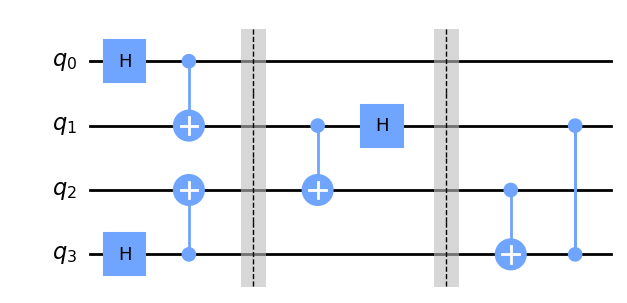

In [8]:
def qc_Eswap():
    from qiskit import QuantumCircuit
    qc = QuantumCircuit(4, name='Eswap')
    qc.h([0,3]); qc.cx(0,1); qc.cx(3,2) # cria os pares emaranhados
    qc.barrier()
    qc.cx(1,2); qc.h(1) # muda da base computacional para a base de Bell 
    qc.barrier()
    qc.cx(2,3); qc.cz(1,3) # envia a informação 'clássica'
    return qc
qces = qc_Eswap(); qces.draw('mpl')

### Simulação

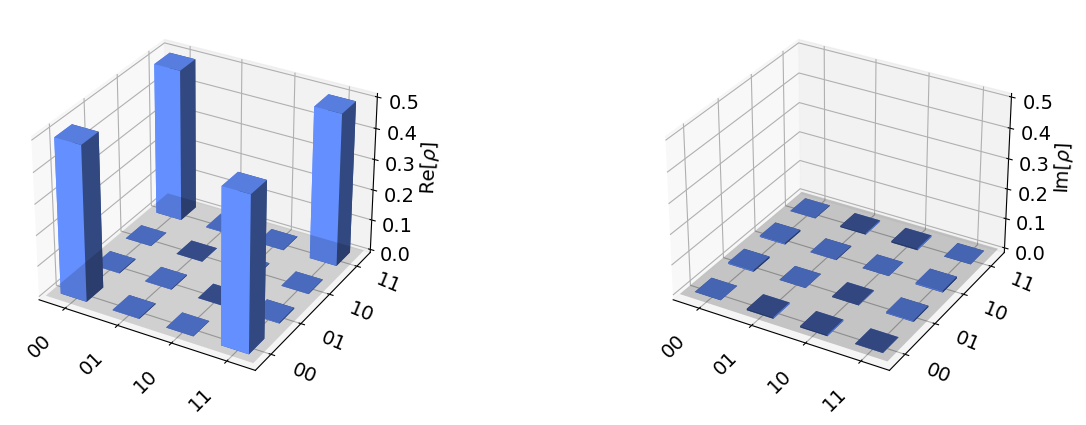

In [95]:
from qiskit import Aer, QuantumCircuit; import qiskit
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.visualization import plot_state_city
simulator = Aer.get_backend('qasm_simulator'); qc = QuantumCircuit(4); qces = qc_Eswap(); qc.append(qces, [0,1,2,3])
qstc = state_tomography_circuits(qc, [0,3]); job = execute(qstc, backend=simulator, shots=nshots)
qstf = StateTomographyFitter(job.result(), qstc); rho = qstf.fit(method='lstsq'); plot_state_city(rho)

In [96]:
from qiskit.quantum_info import state_fidelity
F = state_fidelity(rho,Phip); print('F = ',F)

F =  0.995252634024559


### Experimento

In [80]:
import qiskit
qiskit.IBMQ.save_account('72f5d1e3769658b4908c384492eb3a9bd6d6ac4ab1fdf613d7fbe72884114d62728d6fd60a8bf8d0b6698f2f5463a605742658fee1ce3318181105c6acb8120e', 
                  overwrite = True)
qiskit.IBMQ.load_account()
#provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider = qiskit.IBMQ.get_provider(hub='ibm-q-research-2', group='federal-uni-sant-1', project='main')
device = provider.get_backend('ibm_nairobi')
nshots = 2**13

ibmqfactory.load_account:WARNING:2023-10-10 11:51:17,947: Credentials are already in use. The existing account in the session will be replaced.


In [81]:
from qiskit import QuantumCircuit, execute
qc = QuantumCircuit(4); qces = qc_Eswap(); qc.append(qces, [0,1,2,3])
qstc = state_tomography_circuits(qc, [0,3])
job = execute(qstc, backend=device, shots=nshots)
jobid = job.job_id(); print(jobid)

cmjp9zf5mym0008dvmzg


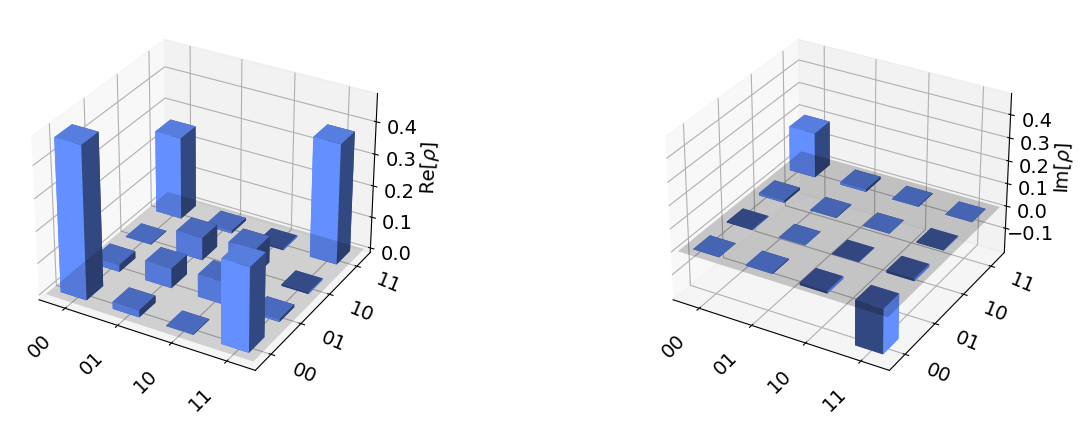

In [93]:
job = device.retrieve_job('cmjp9zf5mym0008dvmzg')
qstf = StateTomographyFitter(job.result(), qstc); rho = qstf.fit(method='lstsq')
from qiskit.visualization import plot_state_city; plot_state_city(rho)

In [83]:
rho

array([[ 0.47577126+0.j        ,  0.02230883+0.00332788j,
         0.002092  -0.01056835j,  0.26098555-0.19678488j],
       [ 0.02230883-0.00332788j,  0.0615527 +0.j        ,
         0.07101693-0.00237001j,  0.00825429-0.01151929j],
       [ 0.002092  +0.01056835j,  0.07101693+0.00237001j,
         0.08438427+0.j        , -0.00484553-0.00359517j],
       [ 0.26098555+0.19678488j,  0.00825429+0.01151929j,
        -0.00484553+0.00359517j,  0.37829177+0.j        ]])

Fidelidade do estado preparado com o estado $|\Phi_+\rangle$

In [87]:
import math; import numpy as np
Phip = np.array([1/math.sqrt(2),0,0,1/math.sqrt(2)]); Phip

array([0.70710678, 0.        , 0.        , 0.70710678])

In [92]:
from qiskit.quantum_info import state_fidelity
F = state_fidelity(rho,Phip); print('F = ',F)

F =  0.6880170590801624


__Problema__: Considerando o protocolo de swap de emaranhamento, determine quais são as operações unitárias locais que Bob deve fazer para que o estado final dos qubits dele e de Alice seja $|\Psi_-\rangle_{AB}.$

__Problema__: Refaça o circuito quântico, a simulação clássica e a simulação quântica (experimento) do protocolo de swap de emaranhamento para preparar os qubits de Alice e Bob no estado $|\Psi_-\rangle_{AB}.$

# Swap de emaranhamento com mitigação de erros

In [3]:
import qiskit
qiskit.IBMQ.save_account('dabd4674f7b3794f740813fec0c5478bfefdebb7d1dca9b7acd41e3f90ed2c8a8b80af26fb3236289fbfc70d0ea334829a836453ac46f96fee68abcb22495ef4', 
                  overwrite = True)
qiskit.IBMQ.load_account()
#provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider = qiskit.IBMQ.get_provider(hub='ibm-q-research-2', group='federal-uni-sant-1', project='main')
device = provider.get_backend('ibm_nairobi')
nshots = 2**13

In [4]:
from qiskit import QuantumRegister, execute
from qiskit.ignis.mitigation.measurement import complete_meas_cal
qr = QuantumRegister(4)
qubit_list = [0, 3]
meas_calibs, state_labels = complete_meas_cal(qubit_list = qubit_list, qr = qr)

In [5]:
job = execute(meas_calibs, backend=device, shots=nshots)
print(job.job_id())

cmr2snercp70008sfsw0


In [6]:
from qiskit.ignis.mitigation.measurement import CompleteMeasFitter
job = device.retrieve_job('cmr2snercp70008sfsw0')
cal_results = job.result()
meas_fitter = CompleteMeasFitter(cal_results, state_labels)

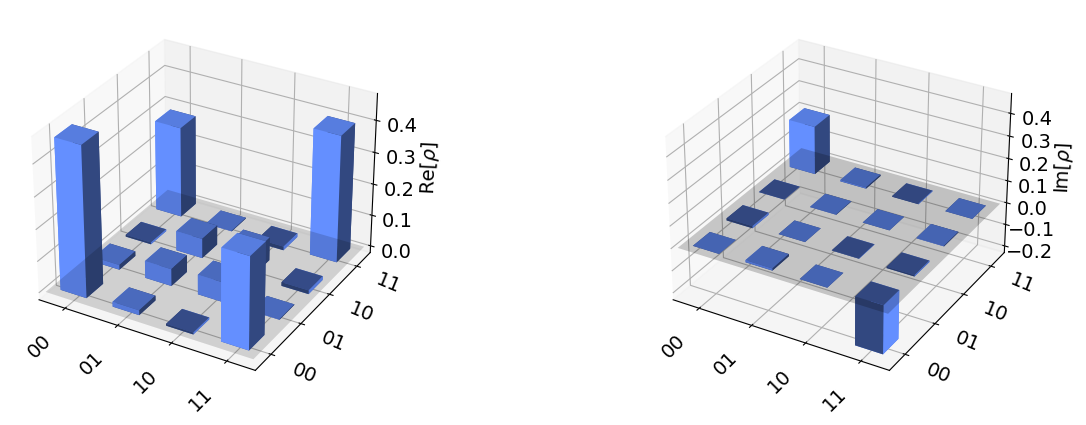

In [10]:
from qiskit import QuantumCircuit, execute
qc = QuantumCircuit(4); qces = qc_Eswap(); qc.append(qces, [0,1,2,3])
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
qstc = state_tomography_circuits(qc, [0,3])
job = device.retrieve_job('cmjp9zf5mym0008dvmzg')
mitigated_results = meas_fitter.filter.apply(job.result())
qstf = StateTomographyFitter(mitigated_results, qstc)
rho = qstf.fit(method='lstsq')
from qiskit.visualization import plot_state_city; plot_state_city(rho)

In [11]:
import numpy as np
import math
from qiskit.quantum_info import state_fidelity
Phip = np.array([1/math.sqrt(2),0,0,1/math.sqrt(2)])
F = state_fidelity(rho,Phip)
print('F = ',F)

F =  0.7242329283201259


__Problema__: Compare os resultados com e sem mitigação de erros para, no contexto do protocolo de swap de emaranhamento, preparar o estado $|\Psi_-\rangle_{AB}$.